
#  Text Classification

###### <font color=Blue>Import all the libraries reuired for this Assignment : request,pandas,beautifulsoup,sklearn,numpy</font>

In [1]:
import urllib.request
import bs4
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.feature_selection import chi2








# TASK 1 : Select two Review Categories:1- BARS,2-Health and medical

###  Find,read and extract  all the sublinks of Review Category "Bars" and store them in a list
#### <font color =blue> STEP 1: In the below block we are taking the main link http://mlg.ucd.ie/modules/yalp/ ,then extract the html </font>
#### <font color =blue>  STEP 2: Review_category0 is a list which stores the extracted links  </font>
#### <font color =blue> STEP 3: find all the sublinks with <a href tag and store in text </font>
#### <font color =blue> STEP 4: Append the 1st set of sublink which is category "Bars" to the list. </font>
#### <font color =blue> STEP 5: Append it to the main Link </font>
#### <font color =blue> STEP 6: Run the loop again and find all the links which contains the actual reviews inside sublink "BARS" and append the sublinks containing reviews to the list. </font>


In [2]:
ll = "http://mlg.ucd.ie/modules/yalp/"
for i in range(2):
    read_link = urllib.request.urlopen(ll) #read the main link
    extract_html = read_link.read().decode()#extract the link
    Review_category0 =[]#deine list to store sublinks of category "bars"
    parser = bs4.BeautifulSoup(extract_html,"html.parser")
    for match in parser.find_all('a'):
        text = match.get('href')#find all links in the tag <a href
        Review_category0.append(text)#append sublink with main link
    ll= ll+Review_category0[1]#contenate with the link and run loop till all the sublinks in the "bar" Category are read.
print(len(Review_category0))

68


###  Find,read and extract  all the sublinks of Review Category "Health and medical " and store them in a list
#### <font color =blue> STEP 1: In the below block we are taking the main link http://mlg.ucd.ie/modules/yalp/ ,then extract the html </font>
#### <font color =blue>  STEP 2: Review_category1 is a list which stores the extracted links  </font>
#### <font color =blue> STEP 3: find all the sublinks with <a href tag and store in text </font>
#### <font color =blue> STEP 4: Append the 1st set of sublink which is category "Health and medical" to the list. </font>
#### <font color =blue> STEP 5: Append it to the main Link </font>
#### <font color =blue> STEP 6: Run the loop again and find all the links which contains the actual reviews inside sublink "Health and medical" and append the sublinks containing reviews to the list. </font>


In [3]:
lls = "http://mlg.ucd.ie/modules/yalp/"
for i in range(2):
    read_link = urllib.request.urlopen(lls) #read the main link
    extract_html = read_link.read().decode()#extract the link
    Review_category1 =[]#define list to store sublinks of category "Health and medical"
    parser = bs4.BeautifulSoup(extract_html,"html.parser")
    for match in parser.find_all('a'):
        text = match.get('href')#find all links in the tag <a href
        Review_category1.append(text)#append sublink with main link
    lls= lls+Review_category1[2]#contenate with the link and run loop till all the sublinks in the "Health and medical" Category are read
print(len(Review_category1))

122


###  In the below block all the sublinks from "Bars" category and "Health and medical" are concatenated to the main link
#### <font color=blue> Bars category  links are stored in list Link_sublinksCat0</font>
#### <font color=blue>Health and medical category links are stored in list Link_sublinksCat2</font>

In [4]:
string = "http://mlg.ucd.ie/modules/yalp/"
Link_sublinksCat0 =[]# define a list to store all links of bars category
for i  in range(len(Review_category0)):
    Link_sublinksCat0.append(string+ Review_category0[i])#concatenate and append all links with reviews from bars category to main link

Link_sublinksCat2 =[]# define a list to store all links of Health and medical category
for i  in range(len(Review_category1)):
    Link_sublinksCat2.append(string+ Review_category1[i])#concatenate and append all links with reviews from Health and medical  category to main link


#### <font color=blue>Review category sublinklist  from both the categories are stored in one list TwocategoriesList</font>
#### <font color=blue>TwocategoriesList = contains all the reviews from both the categories</font>

In [5]:
TwocategoriesList =[Link_sublinksCat0]+[Link_sublinksCat2]# Link_sublinksCat0 and Link_sublinksCat2 list are added as sublist in TwocategoriesList as main list 
print((len(TwocategoriesList)))

2


In [6]:
TwocategoriesList

[['http://mlg.ucd.ie/modules/yalp/reviews_lU0OdZrzNmLuU7SGvONYiQ.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_k2a0B5nlT3V9zzVrpgcGeQ.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_xxelcbat6roueQvnk3TRmA.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_hFT3HuxVZJb1uYEsYfp-0A.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_PMH637woNo9ojZWxPLVULw.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_KBxus2mJ-AB97eYnIX7Srg.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_PJerxJc0SN9h6hXlqSQc5w.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_iE2GBLT00db-qEHye-Jztg.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_NJ4S3JX56JEZGWlAfpF9kw.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_mtWFEF2yTAALgBKZPuxkGw.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_-n27mJ_jQWGCuIukTvg9Mg.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_JhRxDdmZSGDG_u7cGxaYrw.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_ftqncUx1y6Otpvz78H9WhQ.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_e79I3sSDUCrsfpKPvwnAsg

### Function "reviewrating" which returns all the rating and reviews of all the links from both the categories


In [7]:
def reviewrating(category):   
    rewlist =[] # list which stores all the reviews
    rating = [] # list which stores all the ratings
    for eachlink in category :
        response = urllib.request.urlopen(eachlink)# read each link from the category
        html = response.read().decode()# extract the html
        parser = bs4.BeautifulSoup(html,"html.parser")
        for rew in parser.findAll('p',class_='text'):#find all the tags with text which contain review
            rewlist.append(rew.text)#append reviews to the list rewlist
        for R in parser.findAll('img'):#find all the img tags which contain rating 1,2,3,4,5
             if R.get('alt')!=None:
                ratee = (R.get('alt')[0])
                if int(ratee)<4:# if less than 4 append negative to the list rating,otherwise positive
                    rating.append('Negative')
                else:
                    rating.append('Positive')
    return rewlist,rating

### Rating and reviews from Category "Bars"

In [8]:
REW1,RAT1 = reviewrating(Link_sublinksCat0)#Call function reviewrating and store rating and reviews in REW1 and RAT1


### Rating and reviews from Category "Health and medical"

In [9]:
REW2,RAT2 = reviewrating(Link_sublinksCat2)#Call function reviewrating and store rating and reviews in REW2 and RAT2


### Dataframe DF1 for REVIEWS and RATINGS created from lists of first category REW1,RAT1

In [10]:
DF1= pd.DataFrame(np.column_stack([REW1, RAT1]),columns=['REVIEWS', 'RATINGS'])
#DF1 dataframe stores reviews and ratings from 1st category

### Dataframe DF2 for REVIEWS and RATINGS created from lists of second category REW2,RAT2

In [11]:
DF2=pd.DataFrame(np.column_stack([REW2, RAT2]),columns=['REVIEWS', 'RATINGS'])
#DF2 dataframe stores reviews and ratings from 2nd category

# TASK 2(a): Numeric Representation of Data

In [12]:
# Representing Data Categically usinf label encoding

lb1 = LabelEncoder()
# take Dataframe column ratings from DF1 and represent categorically
DF1['Categorical_Rating'] = lb1.fit_transform(DF1['RATINGS']) 


lb2 = LabelEncoder()
# take Dataframe column ratings from DF2 and represent categorically
DF2['Categorical_Rating'] = lb2.fit_transform(DF2['RATINGS'])

DF1.head(10)#show output from first 10 rows dof DF1

,REVIEWS,RATINGS,Categorical_Rating
0,It would help if the front girl don't just sit...,Negative,0
1,One star because that's the least amount you c...,Negative,0
2,"Bad time today. Dirty windows, table sticky, h...",Negative,0
3,My second visit in the last year. Both experie...,Negative,0
4,"Absolutely awful! Took forever to get food, fo...",Negative,0
5,"1.wait time was 30 minutes,then we get to tabl...",Negative,0
6,The food was terrible and the service was even...,Negative,0
7,Party of six for my daughters birthday. She re...,Negative,0
8,"I've been twice now in the last couple month, ...",Positive,1
9,Took my family from out of town here...never a...,Negative,0


In [13]:
DF2.head(12)#show output from first 10 rows dof DF1

,REVIEWS,RATINGS,Categorical_Rating
0,I have so many good things to say about this p...,Positive,1
1,I found them to be highly skilled and an exper...,Positive,1
2,Where do I even begin? This office has been so...,Positive,1
3,I went in because I had toothache and needed a...,Positive,1
4,Found a new dental office. This place is amazi...,Positive,1
5,"Dr. Carlos is always on top of things, I've ne...",Positive,1
6,Dr. Carlos and the staff were very friendly. T...,Positive,1
7,Love these guys! Had a chip in my tooth and no...,Positive,1
8,I just found this office in Scottsdale and the...,Positive,1
9,Dr. Mandap has been my dentist for many years ...,Positive,1


In [14]:
def dataframe_tfid(dataframe):
    count_vector = CountVectorizer()
    dataframe_count = count_vector.fit_transform(dataframe)
    tfidf_transform = TfidfTransformer()
    dataframe_count_tfidf = tfidf_transform.fit_transform(dataframe_count)
    return dataframe_count_tfidf 

In [15]:
a= dataframe_tfid(DF1["REVIEWS"])
b= dataframe_tfid(DF2["REVIEWS"])
model=["NaiveBayes","Logistic Regression","DecisionTree","KNN","SVM","RandomForest"]
accuracy_df1=[]
accuracy_df2=[]


In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(a, DF1['Categorical_Rating'],test_size=0.3 ,random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(b, DF2['Categorical_Rating'],test_size=0.3 ,random_state = 0)



In [17]:
def NaiveBayes(x_train,x_test,y_train,y_test):

    clf = MultinomialNB()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    return accuracy_score(y_test, y_pred)

In [18]:
accuracy_df1.append(NaiveBayes(X_train1, X_test1, y_train1, y_test1))
accuracy_df2.append(NaiveBayes(X_train2, X_test2, y_train2, y_test2))


In [19]:
def log_reg(x_train,x_test,y_train,y_test):
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    return accuracy_score(y_test, y_pred)

In [20]:
accuracy_df1.append(log_reg(X_train1, X_test1, y_train1, y_test1))
accuracy_df2.append(log_reg(X_train2, X_test2, y_train2, y_test2))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
def DecisionTree(x_train,x_test,y_train,y_test):
    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [22]:
accuracy_df1.append(DecisionTree(X_train1, X_test1, y_train1, y_test1))
accuracy_df2.append(DecisionTree(X_train2, X_test2, y_train2, y_test2))

In [23]:

def KNN(x_train,x_test,y_train,y_test):
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [24]:
accuracy_df1.append(KNN(X_train1, X_test1, y_train1, y_test1))
accuracy_df2.append(KNN(X_train2, X_test2, y_train2, y_test2))

In [25]:

def SVM(x_train,x_test,y_train,y_test):
    
    clf = LinearSVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [26]:
accuracy_df1.append(SVM(X_train1, X_test1, y_train1, y_test1))

accuracy_df2.append(SVM(X_train2, X_test2, y_train2, y_test2))

In [27]:

def RandomForest(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return accuracy_score(y_test, y_pred)

In [28]:
accuracy_df1.append(RandomForest(X_train1, X_test1, y_train1, y_test1))
accuracy_df2.append(RandomForest(X_train2, X_test2, y_train2, y_test2))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


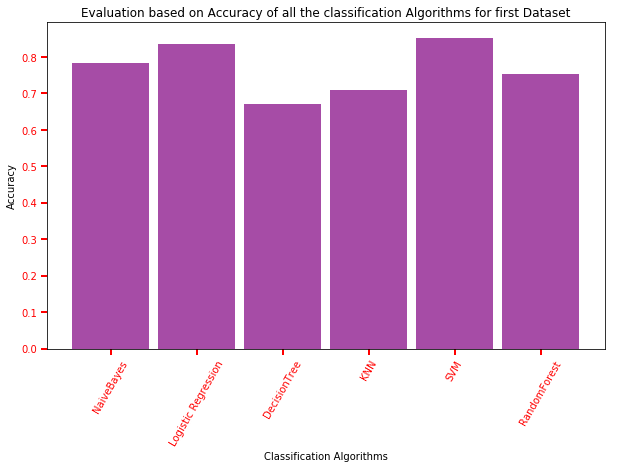

NaiveBayes  0.7831050228310502
Logistic Regression  0.8356164383561644
DecisionTree  0.6712328767123288
KNN  0.7077625570776256
SVM  0.8515981735159818
RandomForest  0.7534246575342466
SVM has maximum Accuracy= 85.15981735159818 %


In [29]:
import matplotlib.pyplot as plt

model=["NaiveBayes","Logistic Regression","DecisionTree","KNN","SVM","RandomForest"]

plt.figure(figsize=(10, 6))
plt.tick_params(direction='out', length=6, width=2, colors='r',grid_color='r', grid_alpha=0.98)
plt.bar(model, accuracy_df1, align='center', alpha=0.7,color = 'purple',width=0.9)
plt.xticks(model, model,rotation='60')
plt.ylabel('Accuracy')
plt.xlabel('Classification Algorithms')
plt.title('Evaluation based on Accuracy of all the classification Algorithms for first Dataset')
plt.show()
for i in range(6):
    print(model[i],"",accuracy_df1[i])
    
print('\033[1m'+'SVM has maximum Accuracy=',max(accuracy_df1)*100,'%')

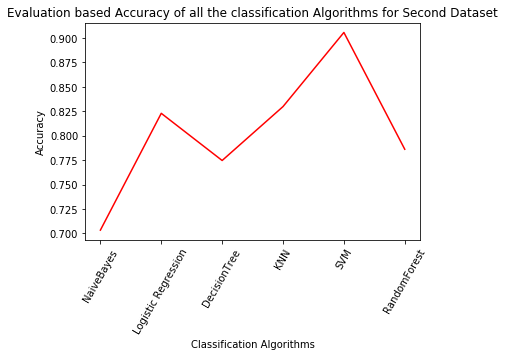

NaiveBayes          0.7034482758620689
Logistic Regression          0.8229885057471265
DecisionTree          0.774712643678161
KNN          0.8298850574712644
SVM          0.9057471264367816
RandomForest          0.7862068965517242
SVM has maximum Accuracy= 90.57471264367815 %


In [30]:
plt.plot(model,accuracy_df2, color='r')
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')
plt.xticks(model, model,rotation='60')
plt.title('Evaluation based Accuracy of all the classification Algorithms for Second Dataset')
plt.show()
for i in range(6):
    print(model[i],"        ",accuracy_df2[i])
print('\033[1m'+'SVM has maximum Accuracy=',max(accuracy_df2)*100,'%')

In [31]:
clf = MultinomialNB()
dlf = LogisticRegression()
elf = DecisionTreeClassifier()
flf = KNeighborsClassifier()
glf = LinearSVC()
hlf = RandomForestClassifier()
cross_acc1=[]
cross_acc2=[]
cross_acc1.append(cross_val_score(clf, a, DF1["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc2.append(cross_val_score(clf, b, DF2["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc1.append(cross_val_score(dlf, a, DF1["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc2.append(cross_val_score(dlf, b, DF2["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc1.append(cross_val_score(elf, a, DF1["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc2.append(cross_val_score(elf, b, DF2["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc1.append(cross_val_score(flf, a, DF1["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc2.append(cross_val_score(flf, b, DF2["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc1.append(cross_val_score(glf, a, DF1["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc2.append(cross_val_score(glf, b, DF2["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc1.append(cross_val_score(hlf, a, DF1["Categorical_Rating"], scoring='accuracy', cv=5))
cross_acc2.append(cross_val_score(hlf, b, DF2["Categorical_Rating"], scoring='accuracy', cv=5))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in

In [32]:
#df1
cross_acc1[0]=cross_acc1[0].mean()
cross_acc1[1]=cross_acc1[1].mean()
cross_acc1[2]=cross_acc1[2].mean()
cross_acc1[3]=cross_acc1[3].mean()
cross_acc1[4]=cross_acc1[4].mean()
cross_acc1[5]=cross_acc1[5].mean()

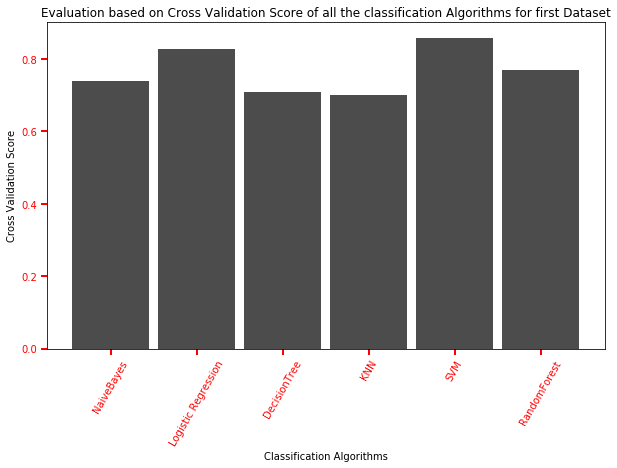

NaiveBayes          0.7390410958904109
Logistic Regression          0.8287671232876711
DecisionTree          0.7082191780821917
KNN          0.6993150684931507
SVM          0.858219178082192
RandomForest          0.7684931506849315
SVM has highest score= 0.858219178082192


In [33]:
model=["NaiveBayes","Logistic Regression","DecisionTree","KNN","SVM","RandomForest"]
plt.figure(figsize=(10, 6))
plt.tick_params(direction='out', length=6, width=2, colors='r',grid_color='r', grid_alpha=0.98)
plt.bar(model, cross_acc1, align='center', alpha=0.7,color = 'black',width=0.9)
plt.xticks(model, model,rotation='60')
plt.ylabel('Cross Validation Score')
plt.xlabel('Classification Algorithms')
plt.title('Evaluation based on Cross Validation Score of all the classification Algorithms for first Dataset')
plt.show()
for i in range(6):
    print(model[i],"        ",cross_acc1[i])
print('\033[1m'+'SVM has highest score=',max(cross_acc1))

In [34]:
# from the accuracy and the cross validation score we get to know that for both the dataframe SVM is a better
# algorithms as compared to others
cross_acc2[0]=cross_acc2[0].mean()
cross_acc2[1]=cross_acc2[1].mean()
cross_acc2[2]=cross_acc2[2].mean()
cross_acc2[3]=cross_acc2[3].mean()
cross_acc2[4]=cross_acc2[4].mean()
cross_acc2[5]=cross_acc2[5].mean()
print(cross_acc2)

[0.7206870146063487, 0.8634209107410765, 0.7765447701005916, 0.7717338063390807, 0.9234523433178714, 0.8220839314584494]


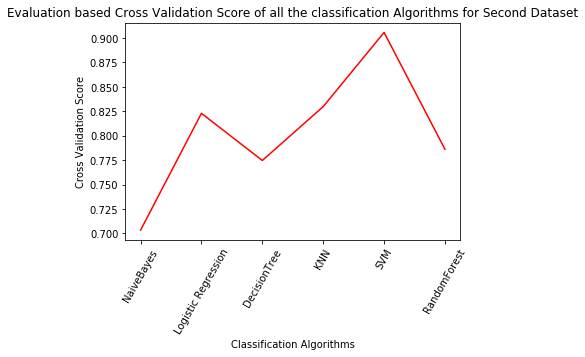

NaiveBayes          0.7206870146063487
Logistic Regression          0.8634209107410765
DecisionTree          0.7765447701005916
KNN          0.7717338063390807
SVM          0.9234523433178714
RandomForest          0.8220839314584494
SVM has Highest Cross Validation Score = 0.9234523433178714


In [35]:
plt.plot(model,accuracy_df2, color='r')
plt.xlabel('Classification Algorithms')
plt.ylabel('Cross Validation Score')
plt.xticks(model, model,rotation='60')
plt.title('Evaluation based Cross Validation Score of all the classification Algorithms for Second Dataset')
plt.show()
for i in range(6):
    print(model[i],"        ",cross_acc2[i])
print('\033[1m'+'SVM has Highest Cross Validation Score =',max(cross_acc2))

# TASK 2(c) Test the predictions of the classification model using an appropriate evaluation strategy.

# Confusion Matrix for DF1 dataset

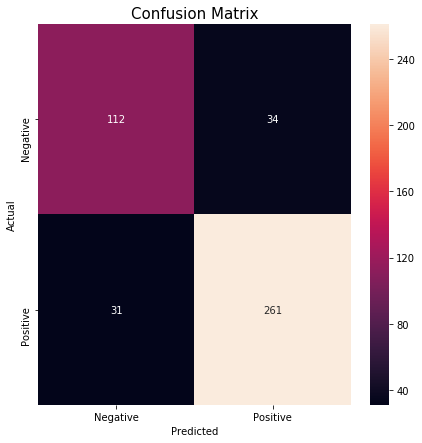

In [36]:



model = LinearSVC() # selecting svm as the model as it is the best model 


# splitting the dataset in to training and test set.
X_train, X_test, y_train, y_test = train_test_split(a, DF1['Categorical_Rating'],test_size=0.3 ,random_state = 0)


# l has the unique values of RATING column
l=['Negative','Positive']


model.fit(X_train, y_train) # Fitting the X_train and y_train to the model
y_pred = model.predict(X_test) # Putting X_test into predict method
conf_mat = confusion_matrix(y_test, y_pred) # calulating the confusion matrix for the model
fig, ax = plt.subplots(figsize=(7,7))  # figsize is the size of the figure
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=l , yticklabels=l)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

# From the above confusion matrix we can compute the correctly classified 
# instances ( the True Positive and the False Positive) which is 112+261 = 373.
# Therefore, the acuuracy is 373 / (112+261+31+34) = 0.8515 which is equivalent to 85.15 %

In [37]:
# the following is the classification report which has values of various metrics like precision, recall,
# f1-score, Support

print(metrics.classification_report(y_test, y_pred, target_names=l))



              precision    recall  f1-score   support

    Negative       0.78      0.77      0.78       146
    Positive       0.88      0.89      0.89       292

   micro avg       0.85      0.85      0.85       438
   macro avg       0.83      0.83      0.83       438
weighted avg       0.85      0.85      0.85       438



# The above is the classification report for DF1 dataset

# Confusion Matrix for DF2 dataset

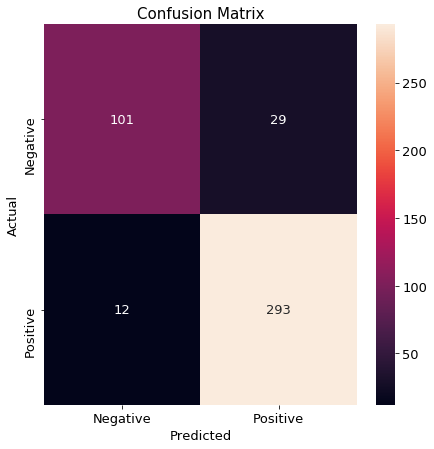

In [38]:



model = LinearSVC()   # selecting svm as the model as it is the best model 


# splitting the dataset in to training and test set.
X_train, X_test, y_train, y_test = train_test_split(b, DF2['Categorical_Rating'],test_size=0.3 ,random_state = 0)

l=['Negative','Positive']

# l has the unique values of RATING column
model.fit(X_train, y_train) # Fitting the X_train and y_train to the model
y_pred = model.predict(X_test) # Putting X_test into predict method
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))  # figsize is the size of the figure
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=l , yticklabels=l)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

# From the above confusion matrix we can compute the correctly classified
# instances ( the True Positive and the True Negetive) which is 101+293 = 394.
# Therefore, the acuuracy is 394 / (101+293+12+29) = 0.905 which is equivalent to 90.5 %

In [39]:
# the following is the classification report for dataset DF2 which has values of various metrics like precision, recall,
# f1-score, Support

print(metrics.classification_report(y_test, y_pred, target_names=l))


              precision    recall  f1-score   support

    Negative       0.89      0.78      0.83       130
    Positive       0.91      0.96      0.93       305

   micro avg       0.91      0.91      0.91       435
   macro avg       0.90      0.87      0.88       435
weighted avg       0.91      0.91      0.90       435



# The above is the classification report for DF2 dataset

# Task 3a: Train a classification model on the data from “Category A”, and evaluate its performance on the data from “Category B”.

In [40]:
model = LinearSVC() # selecting svm as the model , as we have seen in the above section
                    # its the best model for our data

    
# dividing the dataset into train and test data    
X_train, X_test, y_train, y_test = train_test_split(a,DF1["Categorical_Rating"],test_size=0.3 ,random_state = 0)

# Training the classification model on the data from “Category A”
model.fit(X_train, y_train) # fitting the model on X_train and y_train




LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [41]:
vectorizer = TfidfVectorizer()
A = vectorizer.fit_transform(DF1["REVIEWS"]).toarray()
A.shape

(1460, 9624)

In [42]:
# transforming the Category B data so that it has the same number of features as that of Category A
B=vectorizer.transform(DF2["REVIEWS"]).toarray()
B.shape

(1450, 9624)

In [43]:
# evaluating the performance on the data from category B
y_pred = model.predict(B)
y_pred.shape

(1450,)

In [44]:
# printing the classification report of the model that is trained on data from Category A and 
# then evaluated(tested) on data from Category B


print(metrics.classification_report(DF2["Categorical_Rating"], y_pred, target_names=DF2['RATINGS'].unique()))

              precision    recall  f1-score   support

    Positive       0.69      0.90      0.78       407
    Negative       0.96      0.84      0.89      1043

   micro avg       0.86      0.86      0.86      1450
   macro avg       0.82      0.87      0.84      1450
weighted avg       0.88      0.86      0.86      1450



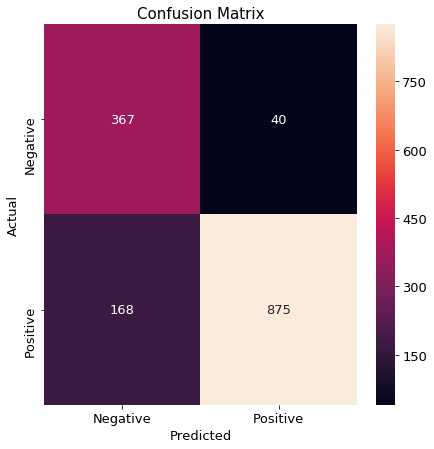

In [45]:



# l has unique values of the RATINGS column
l=['Negative','Positive']

conf_mat = confusion_matrix(DF2["Categorical_Rating"], y_pred) # computing the confusuion matrix

fig, ax = plt.subplots(figsize=(7,7))  # figsize is the size of the figure
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=l , yticklabels=l)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

# From the above confusion matrix we can compute the correctly classified instances ( the True Positive and the True Negetive) which is 101+293 = 394. Therefore, the acuuracy is (367 +875) / (367 +875+168+40) = 0.8565 which is equivalent to 85.65 % . This is the accuracy of model being trained on data from Category "A" and evaluated on data from Category "B"



# Task 3b: Train a classification model on the data from “Category B”, and evaluate its performance on the data from “Category A”.

In [46]:
model = LinearSVC() # selecting svm as the model , as we have seen in the above section
                    # its the best model for our data


    
# dividing the dataset into train and test data      
X_train, X_test, y_train, y_test = train_test_split(b,DF2["Categorical_Rating"],test_size=0.3 ,random_state = 0)

# Training the classification model on the data from “Category B”
model.fit(X_train, y_train) # fitting the model on X_train and y_train




LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [47]:
vectorizer = TfidfVectorizer()
B = vectorizer.fit_transform(DF2["REVIEWS"]).toarray()

B.shape

(1450, 9065)

In [48]:
# transforming the Category A data so that it has the same number of features as that of Category B
A1=vectorizer.transform(DF1["REVIEWS"]).toarray()

A1.shape

(1460, 9065)

In [49]:

# evaluating the performance on the data from category A
y_pred = model.predict(A1)
y_pred.shape

(1460,)

In [50]:
# printing the classification report of the model that is trained on data from Category B and 
# then evaluated(tested) on data from Category A

print(metrics.classification_report(DF1["Categorical_Rating"], y_pred, target_names=DF1['RATINGS'].unique()))

              precision    recall  f1-score   support

    Negative       0.92      0.59      0.72       565
    Positive       0.79      0.97      0.87       895

   micro avg       0.82      0.82      0.82      1460
   macro avg       0.85      0.78      0.79      1460
weighted avg       0.84      0.82      0.81      1460



[[331 234]
 [ 29 866]]


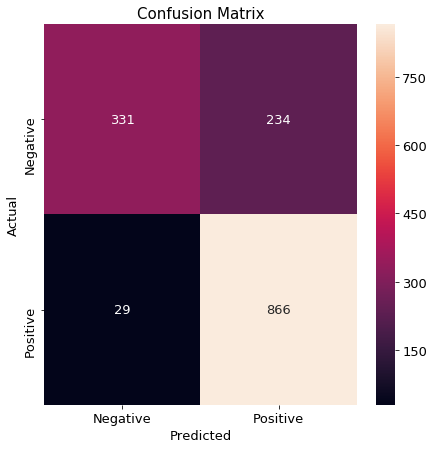

In [51]:
# l has unique values of the RATINGS column

l=['Negative','Positive']
conf_mat = confusion_matrix(DF1["Categorical_Rating"], y_pred)
print(conf_mat)
fig, ax = plt.subplots(figsize=(7,7))  # figsize is the size of the figure
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=l , yticklabels=l)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

# From the above confusion matrix we can compute the correctly classified instances ( the True Positive and the True Negetive) which is 331+866 =  1197 Therefore, the acuuracy is (331+866) / (331+866+29+234) = 0.8198 which is equivalent to 81.98 % . This is the accuracy of model being trained on data from Category "B" and evaluated on data from Category "A"

